In [9]:
from hcipy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import zwfs

In [10]:
NPUP = 256
DPUP = 1.5

In [11]:
pupil_grid = make_pupil_grid(NPUP, DPUP)
aperture = make_circular_aperture(True)
telescope_pupil = aperture(pupil_grid)
ZWFS_ideal = ZernikeWavefrontSensorOptics(pupil_grid)

In [12]:
def plot_ZWFS(wavefront_in, wavefront_out):
    '''Plot the input wavefront and ZWFS response.

    Parameters
    ---------
    wavefront_in : Wavefront
        The aberrated wavefront coming in
    wavefront_out : Wavefront
        The wavefront_in propagated through the ZWFS
    '''

    # Plotting the phase pattern and the PSF
    fig = plt.figure()
    ax1 = fig.add_subplot(131)
    im1 = imshow_field(wavefront_in.amplitude, cmap='gray')
    ax1.set_title('Input amplitude')

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    ax2 = fig.add_subplot(132)
    im2 = imshow_field(wavefront_in.phase, cmap='RdBu')
    ax2.set_title('Input phase')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    ax3 = fig.add_subplot(133)
    im3 = imshow_field(wavefront_out.intensity, cmap='gray')
    ax3.set_title('Output intensity')

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')
    plt.show()

def plot_reconstruction_phase(phase_in, phase_out, telescope_pupil):
    '''Plot the incoming aberrated phase pattern and the reconstructed phase pattern

    Parameters
    ---------
    phase_in : Field
        The phase of the aberrated wavefront coming in
    phase_out : Field
        The phase of the aberrated wavefront as reconstructed by the ZWFS
    '''

    # Calculating the difference of the reconstructed phase and input phase
    diff = phase_out - phase_in
    diff -= np.mean(diff[telescope_pupil >= 0.5])

    # Plotting the phase pattern and the PSF
    fig = plt.figure()
    ax1 = fig.add_subplot(131)
    im1 = imshow_field(phase_in, cmap='RdBu', vmin=-0.2, vmax=0.2, mask=telescope_pupil)
    ax1.set_title('Input phase')

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')

    ax2 = fig.add_subplot(132)
    im2 = imshow_field(phase_out, cmap='RdBu', vmin=-0.2, vmax=0.2, mask=telescope_pupil)
    ax2.set_title('Reconstructed phase')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    ax3 = fig.add_subplot(133)
    im3 = imshow_field(diff, cmap='RdBu', vmin=-0.02, vmax=0.02, mask=telescope_pupil)
    ax3.set_title('Difference')

    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')
    plt.show()

/Users/work/anaconda3/lib/python3.11/site-packages/hcipy/optics/aberration.py:37: RuntimeWarning: divide by zero encountered in power
  res = Field(grid.as_('polar').r**exponent, grid)


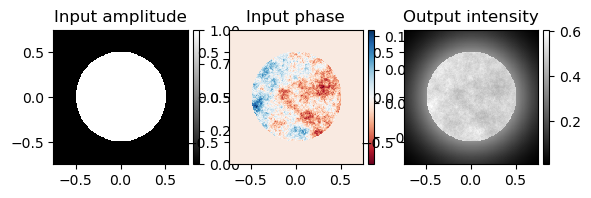

In [13]:
# Creating the aberrated wavefront
phase_aberrated = make_power_law_error(pupil_grid, 0.2, 1)
phase_aberrated -= np.mean(phase_aberrated[telescope_pupil >= 0.5])
wf = Wavefront(telescope_pupil * np.exp(1j * phase_aberrated))

# Applying the ZWFS
wf_out = ZWFS_ideal.forward(wf)

plot_ZWFS(wf, wf_out)

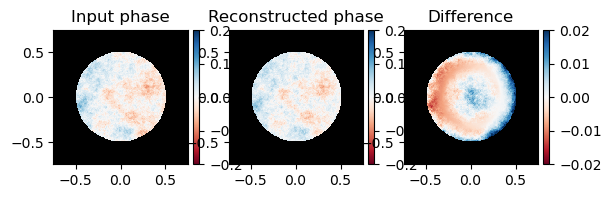

In [14]:
phase_est = zwfs.simple_reconstruction_phase(wf_out.intensity)
plot_reconstruction_phase(phase_aberrated, phase_est, telescope_pupil)